In [1]:
# Import Libraries
import pandas as pd
import numpy as np 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Import Data

In [ ]:
data = pd.read_csv("Salary_Data.csv")
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
data.shape

(30, 2)

In [ ]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


###### Min years of experience is 1.1 with salary of 27414.42 and max years of experience is 10.5 with salary 122391

# Visualization

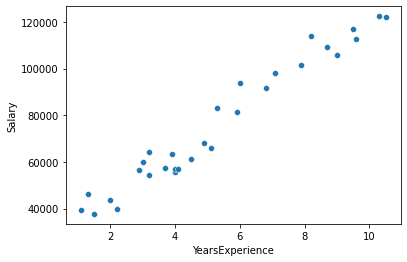

In [ ]:
# Scatter plot shows the Linear Relationship between Dependent Variable 'YearsExperiance' and independent variable 'Salary' 

sns.scatterplot(x='YearsExperience',y='Salary',data=data)


#####Salary looks linear related to years of experience.

####checking the null values in the dataset

In [ ]:

data.isnull().sum().sort_values(ascending=False)

Salary             0
YearsExperience    0
dtype: int64

### Checking the correlation of data

In [ ]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


##### 0.97 is highly correlated


## Data Preparation

In [ ]:
X = data.iloc[:,0].values
X =X.reshape(-1,1)
y = data.iloc[:,-1].values
y = y.reshape (-1,1)

In [ ]:
y

array([[ 39343.],
       [ 46205.],
       [ 37731.],
       [ 43525.],
       [ 39891.],
       [ 56642.],
       [ 60150.],
       [ 54445.],
       [ 64445.],
       [ 57189.],
       [ 63218.],
       [ 55794.],
       [ 56957.],
       [ 57081.],
       [ 61111.],
       [ 67938.],
       [ 66029.],
       [ 83088.],
       [ 81363.],
       [ 93940.],
       [ 91738.],
       [ 98273.],
       [101302.],
       [113812.],
       [109431.],
       [105582.],
       [116969.],
       [112635.],
       [122391.],
       [121872.]])

In [ ]:
train_x ,test_x ,train_y ,test_y =train_test_split(X,y,test_size =0.3 ,random_state = 0)

In [ ]:
train_x.shape

(21, 1)

In [ ]:
test_x.shape

(9, 1)

# Model Building :

In [ ]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Make Predictions on Testing Set
y_pred=regressor.predict(test_x)

In [ ]:
y_pred

array([[ 40817.78327049],
       [123188.08258899],
       [ 65154.46261459],
       [ 63282.41035735],
       [115699.87356004],
       [108211.66453108],
       [116635.89968866],
       [ 64218.43648597],
       [ 76386.77615802]])

In [ ]:
test_y

array([[ 37731.],
       [122391.],
       [ 57081.],
       [ 63218.],
       [116969.],
       [109431.],
       [112635.],
       [ 55794.],
       [ 83088.]])

In [ ]:
print('Mean Sqared Error :',mean_squared_error(test_y,y_pred))
print('R-Square Value :',r2_score(test_y,y_pred))

Mean Sqared Error : 23370078.800832972
R-Square Value : 0.9740993407213511


####The model explains 97.40% of variance

In [ ]:
print('Intercept :',regressor.intercept_)
print('Coefficient :',regressor.coef_)

Intercept : [26777.3913412]
Coefficient : [[9360.26128619]]


####So our linear regression equation is :

Salary = 26777.3913412 + YearsExperience x9360.26128619

## Fitting line to Training set


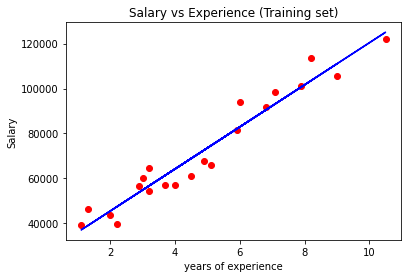

In [ ]:
#Visualizing the Training set results 
#Plot employees of the company categorized by their number of years of experience by their salary
plt.scatter(train_x, train_y, color='red',)
plt.plot(train_x,regressor.predict(train_x), color='blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('years of experience')
plt.ylabel('Salary')
plt.show()

##Predicting on Test Set

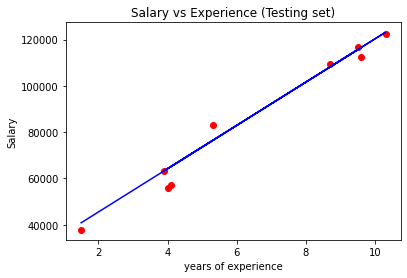

In [ ]:
#Visualizing the Testing set results 
#Plot employees of the company categorized by their number of years of experience by their salary
plt.scatter(test_x, test_y, color='red',)
plt.plot(test_x,regressor.predict(test_x), color='blue')
plt.title('Salary vs Experience (Testing set)')
plt.xlabel('years of experience')
plt.ylabel('Salary')
plt.show()

In [ ]:
y_pred=regressor.predict([[10.5]])
y_pred

array([[125060.13484623]])